# Efficient Portfolio's And How To Beta Hedge Them!
 ## Author: Maurice Hoffman 
 ## Educational Background: BBA Finance Zicklin School of Business Baruch College
 
 ### Email: Maurice.Hoffman82@gmail.com

## Foreword:
### Hello viewer, this file was intentionally created in a "Jupyter Notebook" as to provide insight to those who may be unfamiliar with the Python programming language. If you are so inclined, feel free to read through my comments and explanations behind the code as well as common questions I've received relating to this file from previous viewers.
#### If you are unfamiliar with JupyterNotebooks, in order to "Run" a cell, you must click inside the cell, and press CTRL Enter, each cell requires that you run the previous cell. (EX: You may not run the last cell without running all the cells prior.) 

#### Q: What is this program? 
#### A: This program is intended to automate the generation of "efficient portfolios" and display the beta hedging process. This program extensively utilizes Markowitz/Sharpe portfolio theory which was a favorite topic of mine throughout the duration of my studies. There are brief explanations for those unfamiliar with the aforementioned financial theory, and it is my hope that they aid you in interpreting the code. 

## Imports And Libraries Utilized
##### Pandas for its datahandling capabilities. NumPy for its array manipulating capabilities. Statsmodel for OLS regression, Scipy.Stats for statistical functions that aren't readily available in other libraries. Datetime for  viewer mutability, and Matplotlib for visualization.

#### Note: The !pip install command is left there intentionally as previous viewers have noted that Jupyter may not recognize certain libraries without them. 

In [1]:
!pip install pandas-datareader 
!pip install statsmodels
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from scipy.stats import norm
from datetime import timedelta


print(f" You are accessing this file on: {dt.datetime.now()}!")

     |████████████████████████████████| 109 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 64.9 MB/s eta 0:00:01
 You are accessing this file on: 2021-09-30 15:51:17.575957!


## Pulling Data From Yahoo Finance
### We begin by choosing our list of stocks to read into a pandas dataframe, and we pull the Adj Close variable for further processing.

In [16]:
start = dt.datetime(2019, 1, 1)
now = dt.datetime.now() 
start = now + dt.timedelta(days = (-365))
Stocks = ['AAPL', 'TSLA', 'NFLX', 'XOM', 'T']

df = pdr.DataReader(Stocks, data_source='yahoo', start=start, end=now)['Adj Close']

print(df.head())

Symbols           AAPL        TSLA        NFLX        XOM          T
Date                                                                
2020-09-30  115.069885  429.010010  500.029999  32.003803  26.559910
2020-10-01  116.043625  448.160004  527.510010  30.885115  26.541279
2020-10-02  112.297714  415.089996  503.059998  30.745279  26.718285
2020-10-05  115.755478  425.679993  520.650024  31.453783  26.708967
2020-10-06  112.436821  413.980011  505.869995  31.127497  26.746229


## Initial Data Processing
### We aggregate the 'Adj Close' data and compile such into "Return" data which we will process further!

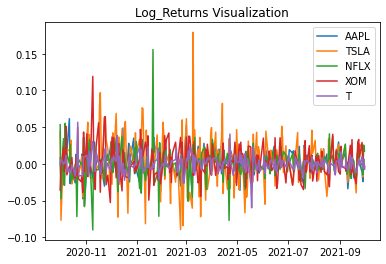

Symbols
AAPL    0.209733
TSLA    0.594808
NFLX    0.197463
XOM     0.620169
T       0.023720
dtype: float64


In [17]:
#Log Returns DataFrame:
Log_Returns = np.log(df/df.shift(1))
Log_Returns.dropna(inplace = True)

plt.plot(Log_Returns)
plt.title('Log_Returns Visualization')
plt.legend(Log_Returns.columns)
plt.show()

#Generate Daily Mean Return
Daily_Mean_Return = Log_Returns.mean()

#Annualize Daily Return By Trading Days (We drop a datapoint so 252-1)
Annual_Mean_Return = Daily_Mean_Return * 251

print(Annual_Mean_Return)

## Covariance Matrix
### Here we generate a covariance matrix utilizing the Log Return data we calculated in the previous cell.

In [18]:
CovarianceMatrixDaily = Log_Returns.cov() 

#Same annualization process
CovarianceMatrixAnnual = CovarianceMatrixDaily * 251

print(CovarianceMatrixDaily)

Symbols      AAPL      TSLA      NFLX       XOM         T
Symbols                                                  
AAPL     0.000309  0.000247  0.000179  0.000012 -0.000008
TSLA     0.000247  0.001139  0.000238  0.000012 -0.000017
NFLX     0.000179  0.000238  0.000482 -0.000061 -0.000031
XOM      0.000012  0.000012 -0.000061  0.000506  0.000123
T       -0.000008 -0.000017 -0.000031  0.000123  0.000139


## Example Portfolio Generation Class!
#### We have now obtained the requisite data required to generate portfolios! Utilizing a Quasi-Monte-Carlo simulation, we may compose a series of different asset weightings which will ultimately determine our portfolio's expected return, volatility, and its Sharpe Ratio! This next cell, is a SAMPLE portfolio generation class which was created to provide clarity for the ACTUAL simulation class. I encourage the viewer to run this cell and observe how at each iteration, one generates new portfolio weights and consequently new returns and volatility. 

In [19]:
Asset_Counter = len(Stocks)

        
class SamplePortfolioGeneration: 
    ###Generate Characteristics need not be in its own function, and may be calculated in the class's initializer ####
    ###              This is solely done for readability purposes as to separate the calculations!                ####
    
    def generate_characteristics(self):
        Weight = np.random.random(Asset_Counter)
        self.PortfolioWeights = (Weight / np.sum(Weight))
        self.PortfolioReturn = np.dot(self.PortfolioWeights, self.ReturnData)
        self.PortfolioVolatility = np.sqrt(np.dot(self.PortfolioWeights, np.dot(self.CovarianceData, self.PortfolioWeights)))
        self.SharpeRatio = self.PortfolioReturn/self.PortfolioVolatility
    
    
    def __init__(self, ReturnData, CovarianceData):
        self.ReturnData = ReturnData
        self.CovarianceData = CovarianceData


        
##Declare An Instance Of The SamplePortfolioGeneration Class

SamplePortfolio = SamplePortfolioGeneration(Annual_Mean_Return, CovarianceMatrixAnnual)

##Call The Method Associated With The SamplePortfolioGeneration Class
SamplePortfolio.generate_characteristics()

print(f"Sample Portfolio Weights: {SamplePortfolio.PortfolioWeights}")
print(f"Sample Portfolio Volatility: {SamplePortfolio.PortfolioVolatility}")
print(f"Sample Portfolio Return: {SamplePortfolio.PortfolioReturn}")
print(f"Sample Portfolio Sharpe Ratio: {SamplePortfolio.SharpeRatio}")

        
        
        

Sample Portfolio Weights: [0.31690991 0.26710191 0.10118537 0.18937925 0.12542356]
Sample Portfolio Volatility: 0.2281458893633504
Sample Portfolio Return: 0.3657432610414132
Sample Portfolio Sharpe Ratio: 1.6031113339891128


## Running Simulations!
#### Now that we are able to understand the process behind the generation of one portfolio, repeating this class structure in a for loop allows us to generate values which we may place in lists. 

#### Q: Why are we generating portfolio's? 
#### A: We are generating portfolio's as a means of obtaining the most optimal composition of weights. Our key metric by which we determine the optimal composition of weights will be our Sharpe Ratio!

#### Q: What is the Sharpe Ratio?
#### A: It reflects a ratio in which each unit of return is expressed in terms of risk. Consider a Sharpe Ratio of 1.5, for every unit of risk, we generate 1.5 units of return. (Our risk metric is expressed in terms of volatility.)


#### Note: A special thanks to Mr. Bernard Brenyah as this upcoming cell is inspired by his work!
#### Please see his medium article if you so wish!
https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94
    




In [22]:
class GeneratePortfolio: 
    def __init__(self, ReturnData, CovarianceData):
        Weight = np.random.random(Asset_Counter)
        self.PortfolioWeights = (Weight / np.sum(Weight))
        self.PortfolioReturn = np.dot(self.PortfolioWeights, ReturnData)
        self.PortfolioVolatility = np.sqrt(np.dot(self.PortfolioWeights, np.dot(CovarianceData, self.PortfolioWeights)))
        self.SharpeRatio = self.PortfolioReturn/self.PortfolioVolatility



N_Portfolios = 50000 #This is the # of simulations!

PortfolioWeights = []
PortfolioReturns = []
PortfolioVol = []
SharpeRatios = []


for Iterator in range(N_Portfolios):
    Portfolio = GeneratePortfolio(Annual_Mean_Return, CovarianceMatrixAnnual)
    PortfolioWeights.append(Portfolio.PortfolioWeights)
    PortfolioReturns.append(Portfolio.PortfolioReturn)
    PortfolioVol.append(Portfolio.PortfolioVolatility)
    SharpeRatios.append(Portfolio.SharpeRatio)


portfolio = {'Returns' : PortfolioReturns, 'Volatility' : PortfolioVol, 'Sharpe Ratio' : SharpeRatios}
for Iterator,Ticker in enumerate(Stocks):
    portfolio[f'{Ticker} Weight'] = [Weight[Iterator] for Weight in PortfolioWeights]


df = pd.DataFrame(portfolio)
print(df.head())


    Returns  Volatility  Sharpe Ratio  AAPL Weight  TSLA Weight  NFLX Weight  \
0  0.337219    0.191270      1.763054     0.208836     0.184839     0.112075   
1  0.488490    0.251031      1.945930     0.184348     0.308341     0.045710   
2  0.193555    0.193082      1.002452     0.311572     0.020877     0.369366   
3  0.317076    0.197330      1.606828     0.131967     0.038155     0.409026   
4  0.486960    0.276242      1.762799     0.118791     0.420133     0.040521   

   XOM Weight  T Weight  
0    0.250855  0.243396  
1    0.413191  0.048411  
2    0.059991  0.238194  
3    0.295001  0.125851  
4    0.325544  0.095011  


## Finding The Most Optimal Portfolio!
#### Utilizing the Panda's loc functions, we are able to find the Optimal Portfio which contains the HIGHEST Sharpe Ratio!
#### Consequently, we get key data from the optimal portfolio that we can do even FURTHER processing on!


In [23]:
MAX_SHARPE = df['Sharpe Ratio'].max()
OptimalPortfolio = df.loc[df['Sharpe Ratio'] == MAX_SHARPE]

print(OptimalPortfolio)


        Returns  Volatility  Sharpe Ratio  AAPL Weight  TSLA Weight  \
11547  0.519609    0.247737      2.097424     0.110424     0.205519   

       NFLX Weight  XOM Weight  T Weight  
11547     0.113873    0.567014   0.00317  


### Visualizing A Crude Example Of The Sharpe Ratio In Effect
#### As a better way of exemplifying the conception behind the Sharpe Ratio, we will be utilizing an extreme simplification for visualization purposes. Do note that this cell is immaterial and solely serves to aid in achieving clarity.

#### Utilizing the np.random.normal function, we are able to generate values consistent with a mean and a given standard deviation. In this crude example, should we have two portfolio's with distinct returns but the same underlying volatility, on a probabilistic basis the optimal portfolio have a greater localization of positive returns! Do note, LN2 represents the sub-optimal portfolio, and as such we can see a skewed distribution with a larger degree of data being localized on left side of the distribution.

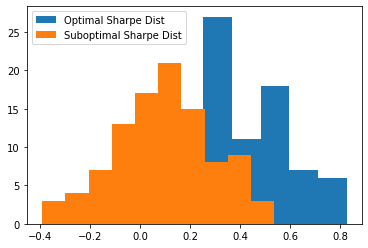

In [24]:
ln1 = []
ln2 = []
mean1 = .35
mean2 = .10
vol1 = .20
vol2 = .20

for i in range(100):
    ln1.append(np.random.normal(mean1, vol1))
    ln2.append(np.random.normal(mean2, vol2))


plt.hist(ln1, label = 'Optimal Sharpe Dist')
plt.hist(ln2, label = 'Suboptimal Sharpe Dist')
plt.legend()


plt.show()

## Value At Risk (VaR) Section
#### Q: What is VaR? 
#### A: VaR is a statistical calculation which endeavors to represent a maximum loss based on a given time-delta. We may utilize historical returns and generate a distribution to determine where a given probability of data lies. In the next cells, we generate a VaR using distinct methods.

### Method 1

In [42]:
x = OptimalPortfolio.to_numpy()
p = []
for i in range(0, 7):
    p.append(x[0][i])

Values = np.array(p)
Optimal_Volatility_Exposure = Values[1]
Optimal_Return = Values[0]


Confidence_Levels = [.99]
Initial_Portfolio_Value = 1000000
DaysToProject = 1

print(f"Portfolio Volatility: {round((Optimal_Volatility_Exposure) * 100, 2)}%")
DegreeOfCert = norm.ppf(Confidence_Levels[0])
VaR = Initial_Portfolio_Value * DegreeOfCert * Optimal_Volatility_Exposure * np.sqrt(DaysToProject/251)
print(f"{Confidence_Levels[0]*100}% VaR is: ${round(VaR, 2)}")



Portfolio Volatility: 24.77%
99.0% VaR is: $36377.1


### Method 2: Conduct VaR analysis by generating random samples from a Gaussian Distribution with a mean of 0 and a standard deviation which is adjusted to the daily time-frame. 
#### Do note, we are utilizing the identical np.random.normal function from the previous slides!
#### As you can see in this distribution, there exists a vertical line representing the cutoff point where 99% of generations exist beyond.
#### In the interest of checking the distinction between these methods, we output the delta.

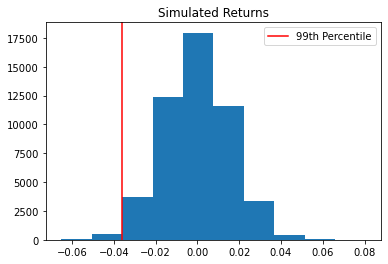

Method 1 VaR 36377.09641908253 : Method 2 VaR 36288.38742980236!
The Delta Between Method 1 (Parametric) VaR and Method 2 (Simulation) VaR is = 89$!


In [46]:
tsim = []
for i in range(50000):
    tsim.append((np.random.normal(0, (Optimal_Volatility_Exposure)*np.sqrt(1/252)))) 
percentileone = np.percentile(np.array(tsim), 1)

VaR2 = abs(Initial_Portfolio_Value * percentileone)

plt.hist(tsim)
plt.title("Simulated Returns")
plt.axvline(x=percentileone, label='99th Percentile', color = "red")
plt.legend()
plt.show()

print(f"Method 1 VaR {VaR} : Method 2 VaR {VaR2}!")
print(f"The Delta Between Method 1 (Parametric) VaR and Method 2 (Simulation) VaR is = {round(VaR - VaR2)}$!")

## CHECKPOINT: 
### Now that we've obtained our most optimal portfolio, our next objective is to compute a Portfolio "Beta" such that we may gauge our amplification to the market. 

### Q: What is Beta?
### A: Beta is a metric that is a key variable in the Capital Asset Pricing Model (CAPM) developed by William Sharpe. For our purposes an initial glance at Beta allows for us to gauge our portfolio's expected responsiveness per unit of movement in the market of choice. In this case we are indexing our Portfolio to the SPY ETF.


### Q: How is Beta Calculated? 
### A: In this scenario, we are opting to calculate Beta by conducting OLS regression on both index and stock (in our given list of stocks) returns!

### Q: Why OLS Regression?
### A: We use Ordinary Least Squares Regression to obtain the slope coefficient associated with the line of best fit. This slope coefficient is the Beta! In laymens terms, it effectively operates on SPY returns such that we can "predict" a given stock's state (return). 

### Q: What about Alpha?
### A: Alpha is the y-intercept which in laymens terms is the value when SPY returns are projected to be 0. For the sake of exemplifying this concept (without units): if Alpha is 3, this represents a stock having excess returns of 3 when SPY returns are projected to be 0!


### Please Note: As you can see, I've opted to create two separate lists for demonstration purposes, one includes SPY as a quasi-mathematical proof to ensure our calculations are in fact accurate. The Beta of SPY as it is the index of interest is 1.0, so by observing this in our list we are able to corroborate that the calculations are in fact correct. 


### Usage Of The LinearRegression Function Source: https://blog.quantinsti.com/asset-beta-market-beta-python/

In [47]:
import statsmodels.api as sm
from statsmodels import regression
def linreg(x, y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    
    return model.params[1]

start = dt.datetime(2019, 1, 1)
now = dt.datetime.now() 

StocksWithSPY = ['AAPL', 'TSLA', 'NFLX', 'XOM', 'T','SPY']

df = pdr.DataReader(StocksWithSPY, data_source='yahoo', start=start, end=now)['Adj Close']

LNRet = np.log(df/df.shift(1))
LNRet.dropna(inplace = True)
Betas = []

SPY_Returns = LNRet['SPY']

for ReturnList in [LNRet[symbl] for symbl in StocksWithSPY]:
    Beta = linreg(SPY_Returns, ReturnList)
    Betas.append(Beta)




print(Betas)
BetasWithoutSPY = []
for Beta in Betas[:-1]:
    BetasWithoutSPY.append(Beta)

print(BetasWithoutSPY)
    


[1.221460205476981, 1.3688029872026342, 0.7915531498650823, 1.1085217924482131, 0.7783524919510636, 1.0000000000000004]
[1.221460205476981, 1.3688029872026342, 0.7915531498650823, 1.1085217924482131, 0.7783524919510636]


## Calculate Portfolio Beta! 
### Now that we have obtained a list with our Beta variables inside it, we are able to calculate a weighted portfolio Beta by computing the dot product of the optimal weights and Betas for each respective stock. 

### Q: So we have a Portfolio Beta, now what?
### A: As previously mentioned, now that we have a Portfolio Beta we may gauge our portfolio's amplification to returns in SPY. If we project a market crash, how would we adequately tackle this scenario? We may take a -1 Beta position to represent our portfolio increasing in value as SPY decreases. Conversely, if we predict specific companies within our portfolio are subject to market duress, we may eliminate idiosyncratic risk from our portfolio by modifying our Beta to 1.

### Q: Why not sell our holdings in the case of a market crash?
### A: Lest we wish to trigger a taxable event, a portfolio hedge may prove a cheaper more efficient option. We may also wish to record the efficacy of the hedge for accounting purposes by checking if this hedge qualifies as a "Efficient Hedge". 

In [48]:
weights = []
for i in range(3, 8):
    weights.append(x[0][i])

PortfolioBeta = np.dot(weights, BetasWithoutSPY)
print(PortfolioBeta)

1.1373444875237926


## Consider The Following:

### Let us impose a scenario by which our current portfolio's projected VaR derived solely from idiosyncratic risk. In order to hedge against this, we may consider modifying our portfolio such that it approximates a Beta of 1. Conversely, if we want inverse exposure to the market we modify our Target Beta to -1! The same corollary applies: as we modify Beta we begin to approximate different degrees of exposure.

### Q: What are we hedging with?
### A: For the purposes of simplicity, we will be opting to hedge with E-Mini Futures on the S&P 500.

### Q: To whom do we accredit the Beta Hedging formula?
### A: John Hull, for those who are inclined to view the forumla please visit: https://www.montana.edu/ebelasco/agec421/hullslides/Ch03Hull.pdf Slide 12


### Do note, we are utilizing YahooFinance to pull Futures data, but there are alternative ways of sourcing data such as the CME API which can be used in conjunction with the Datamine library. We may opt to utilize BeautifulSoup or alternative libraries to scrape data; however for our purposes YahooFinance more than suffices. 

#### Github To Datamine Library (Not Used In This File) https://github.com/CMEGroup/datamine_python

### I encourage you to alter the "Target_Beta" variable (Alter To Values: (-1, 0, 1, 2))  should you wish to observe the theory coinciding with a rational hypothesis as it relates to Beta.

In [49]:
Target_Beta = 1 ##Alter Target Beta To Another Value

################################################################################################################################
PortfolioBeta = round(PortfolioBeta, 2)

Futures = pdr.DataReader('ES=F', data_source='yahoo', start=start, end=now)['Adj Close'][-1]
print(f"Current Adj Close Front Month E-Mini S&P Futures: {Futures}")
print(f"A Theoretical Beta Hedge Of This Portfolio Would Require One To: ")

class FuturesContract:
    
    def __init__(self, FuturesPrice, ContractMultiplier):
        self.FuturesPrice = FuturesPrice
        self.ContractMultiplier = ContractMultiplier
        self.ValueOfContract = self.FuturesPrice * self.ContractMultiplier
        

class HedgeBeta:
    
    def __init__(self, PortValue, PortBeta, TargetBeta, FuturesContract):
        self.PortValue = PortValue
        self.PortBeta = PortBeta
        self.TargetBeta = TargetBeta
        self.ValueHedge = FuturesContract.ValueOfContract
        self.NumContracts = float((self.TargetBeta - self.PortBeta) * (self.PortValue/self.ValueHedge))

Contract = FuturesContract(Futures, 50)
SimulationHedge = HedgeBeta(Initial_Portfolio_Value, PortfolioBeta, Target_Beta, Contract)


if SimulationHedge.NumContracts > 0:
    print(f"Long {round(SimulationHedge.NumContracts, 2)} !")
else:
    print(f"Short {abs(round(SimulationHedge.NumContracts, 2))} contracts!")

Current Adj Close Front Month E-Mini S&P Futures: 4322.75
A Theoretical Beta Hedge Of This Portfolio Would Require One To: 
Short 0.65 contracts!


## Thank you for viewing this file!
#### - Maurice Hoffman 

#### Questions? Thoughts? Discussions?  Email: Maurice.Hoffman82@gmail.com